# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"
units = "metric"

# Build query URL and request your results in Celsius
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get temperature from JSON response
temperature = weather_json["main"]["temp"]

# Report temperature
print(f"The temperature in London is {temperature} C.")

The temperature in London is 12.23 C.


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
city = []
units = "imperial"

#Initiate counter for city number below
number = 1

#Lists for holding required items
city_name = []
cloudiness = []
countries = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#Loop through each city, extract required items, and print result
print('------------------------------')
print('Start of Records')
print('------------------------------')

for city in cities:
    # Build query URL and request your results in Celsius
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        
        city_name.append(weather_json["name"])
        cloudiness.append(weather_json["clouds"]["all"])
        countries.append(weather_json['sys']['country'])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        max_temp.append(weather_json["main"]["temp_max"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        wind_speed.append(weather_json["wind"]["speed"])
        city_record = weather_json["name"]
        print(f'City number {number} of {len(cities)} complete. | Added {city}')
        number = number + 1
    
    except KeyError:
        print(f'Missing data in city number {number} of {len(cities)}. | Skipping {city}')
        number = number + 1
        
print('------------------------------')
print('End of Records')
print('------------------------------')

------------------------------
Start of Records
------------------------------
City number 1 of 636 complete. | Added cape town
City number 2 of 636 complete. | Added te anau
Missing data in city number 3 of 636. | Skipping sentyabrskiy
Missing data in city number 4 of 636. | Skipping yomitan
City number 5 of 636 complete. | Added ushuaia
City number 6 of 636 complete. | Added yellowknife
City number 7 of 636 complete. | Added rikitea
City number 8 of 636 complete. | Added kimbe
City number 9 of 636 complete. | Added constitucion
City number 10 of 636 complete. | Added avarua
City number 11 of 636 complete. | Added severo-kurilsk
City number 12 of 636 complete. | Added cherskiy
City number 13 of 636 complete. | Added thompson
Missing data in city number 14 of 636. | Skipping barentsburg
City number 15 of 636 complete. | Added sulangan
City number 16 of 636 complete. | Added bilibino
City number 17 of 636 complete. | Added hobart
City number 18 of 636 complete. | Added veraval
Missing d

City number 163 of 636 complete. | Added mega
City number 164 of 636 complete. | Added nara
City number 165 of 636 complete. | Added vestmannaeyjar
City number 166 of 636 complete. | Added urucui
City number 167 of 636 complete. | Added godean
City number 168 of 636 complete. | Added iberia
City number 169 of 636 complete. | Added tamworth
City number 170 of 636 complete. | Added north augusta
City number 171 of 636 complete. | Added iqaluit
Missing data in city number 172 of 636. | Skipping tsihombe
City number 173 of 636 complete. | Added zeya
City number 174 of 636 complete. | Added vilyuysk
City number 175 of 636 complete. | Added khasan
City number 176 of 636 complete. | Added east london
City number 177 of 636 complete. | Added arsenyev
City number 178 of 636 complete. | Added yatou
City number 179 of 636 complete. | Added chunhuhub
City number 180 of 636 complete. | Added maldonado
Missing data in city number 181 of 636. | Skipping bargal
City number 182 of 636 complete. | Added

City number 323 of 636 complete. | Added jiaxing
City number 324 of 636 complete. | Added tual
City number 325 of 636 complete. | Added kirakira
City number 326 of 636 complete. | Added zabaykalsk
Missing data in city number 327 of 636. | Skipping phan rang
City number 328 of 636 complete. | Added mirzapur
City number 329 of 636 complete. | Added zeulenroda
City number 330 of 636 complete. | Added hami
City number 331 of 636 complete. | Added divnomorskoye
City number 332 of 636 complete. | Added cabra
City number 333 of 636 complete. | Added manzhouli
City number 334 of 636 complete. | Added dahra
City number 335 of 636 complete. | Added nantucket
City number 336 of 636 complete. | Added soure
City number 337 of 636 complete. | Added mercedes
City number 338 of 636 complete. | Added tagusao
City number 339 of 636 complete. | Added nanjing
City number 340 of 636 complete. | Added mudgee
City number 341 of 636 complete. | Added benghazi
City number 342 of 636 complete. | Added fairlie
C

City number 485 of 636 complete. | Added marsh harbour
City number 486 of 636 complete. | Added sesheke
Missing data in city number 487 of 636. | Skipping ngukurr
City number 488 of 636 complete. | Added schwandorf
City number 489 of 636 complete. | Added sehithwa
City number 490 of 636 complete. | Added mandurah
City number 491 of 636 complete. | Added bengkulu
City number 492 of 636 complete. | Added xaltianguis
City number 493 of 636 complete. | Added nador
City number 494 of 636 complete. | Added great yarmouth
City number 495 of 636 complete. | Added diego de almagro
City number 496 of 636 complete. | Added belyy yar
City number 497 of 636 complete. | Added ust-maya
City number 498 of 636 complete. | Added lensk
Missing data in city number 499 of 636. | Skipping meyungs
City number 500 of 636 complete. | Added murgab
City number 501 of 636 complete. | Added majalgaon
City number 502 of 636 complete. | Added santa maria del oro
City number 503 of 636 complete. | Added amahai
City n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create a dataframe with required items
city_df = pd.DataFrame({"City": city_name,
                        "Cloudiness":cloudiness, 
                        "Date":date, 
                        "Humidity": humidity,
                        "Lat":lat, 
                        "Lng":lng, 
                        "Max Temp": max_temp,
                        "Wind Speed":wind_speed,
                        "Country":countries})

#Save dataframe as csv
pd.DataFrame.to_csv(city_df, 'cities_data.csv')


In [6]:
city_df.head()

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Country
0,Cape Town,75,1598756403,93,-33.93,18.42,39.20,2.24,ZA
1,Te Anau,100,1598756455,71,-45.42,167.72,51.89,7.18,NZ
2,Ushuaia,90,1598756461,91,-54.80,-68.30,32.00,20.80,AR
3,Yellowknife,75,1598756443,81,62.46,-114.35,46.40,18.34,CA
4,Rikitea,10,1598756680,76,-23.12,-134.97,70.12,7.45,PF


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humidity_df = city_df[city_df['Humidity'] > 100]
humidity_df

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Country


In [8]:
# There are no cities with humidity greater than 100 in the data

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

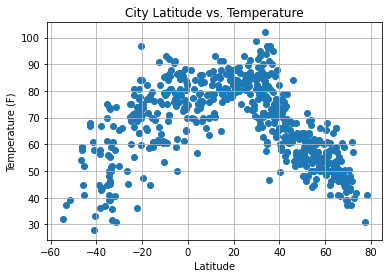

In [8]:
#Plot latitude vs temperature and save as .png

plt.scatter(city_df['Lat'], city_df['Max Temp'])
plt.title(f'City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.savefig('lat_temp.png', bbox_inches='tight')
plt.show()

## Latitude vs. Humidity Plot

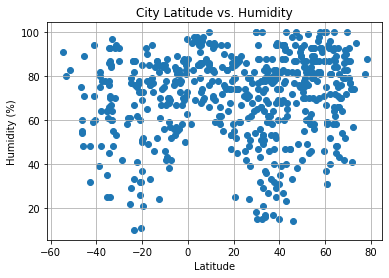

In [9]:
#Plot latitude vs humidity and save as .png
plt.scatter(city_df['Lat'], city_df['Humidity'])
plt.title(f'City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('lat_humid.png', bbox_inches='tight')
plt.show()

## Latitude vs. Cloudiness Plot

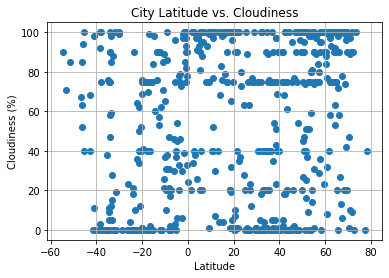

In [10]:
#Plot latitude vs cloudiness and save as .png
plt.scatter(city_df['Lat'], city_df['Cloudiness'])
plt.title(f'City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('lat_cloud.png', bbox_inches='tight')
plt.show()

## Latitude vs. Wind Speed Plot

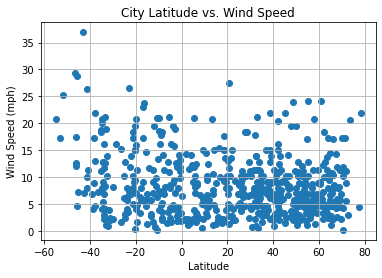

In [11]:
#Plot latitude vs wind speed and save as .png
plt.scatter(city_df['Lat'], city_df['Wind Speed'])
plt.title(f'City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('lat_wind.png', bbox_inches='tight')
plt.show()

## Linear Regression

In [12]:
north_hem = city_df[city_df['Lat'] >= 0]
north_hem.head()

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Country
3,Yellowknife,75,1598756443,81,62.46,-114.35,46.40,18.34,CA
8,Severo-Kuril'sk,47,1598756681,78,50.68,156.12,52.95,10.94,RU
9,Cherskiy,100,1598756573,79,68.75,161.30,44.17,8.10,RU
10,Thompson,75,1598756461,81,55.74,-97.86,53.60,4.70,CA
11,Sulangan,97,1598756681,71,11.14,123.72,84.51,6.71,PH


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

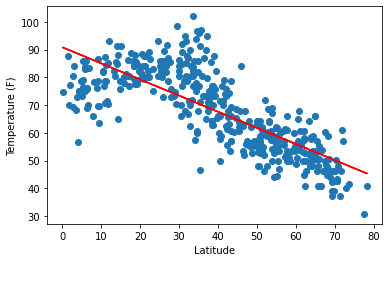

In [13]:
# Add the linear regression equation and line to plot
x_values = north_hem['Lat']
y_values = north_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('north_lat_temp.png', bbox_inches='tight')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [14]:
south_hem = city_df[city_df['Lat'] < 0]
south_hem.head()

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Country
0,Cape Town,75,1598756403,93,-33.93,18.42,39.20,2.24,ZA
1,Te Anau,100,1598756455,71,-45.42,167.72,51.89,7.18,NZ
2,Ushuaia,90,1598756461,91,-54.80,-68.30,32.00,20.80,AR
4,Rikitea,10,1598756680,76,-23.12,-134.97,70.12,7.45,PF
5,Kimbe,3,1598756680,53,-5.55,150.14,91.40,10.87,PG


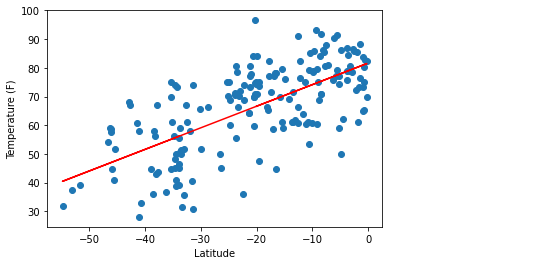

In [15]:
# Add the linear regression equation and line to plot
x_values = south_hem['Lat']
y_values = south_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('south_lat_temp.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

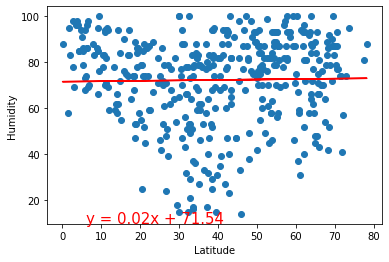

In [16]:
# Add the linear regression equation and line to plot
x_values = north_hem['Lat']
y_values = north_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('north_lat_hum.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

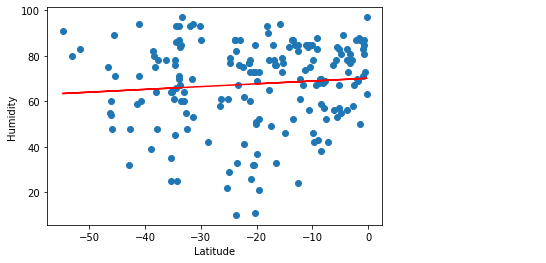

In [17]:
# Add the linear regression equation and line to plot
x_values = south_hem['Lat']
y_values = south_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('south_lat_hum.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

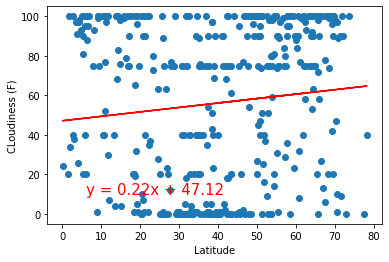

In [18]:
# Add the linear regression equation and line to plot
x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('CLoudiness (F)')
plt.savefig('north_lat_cloud.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

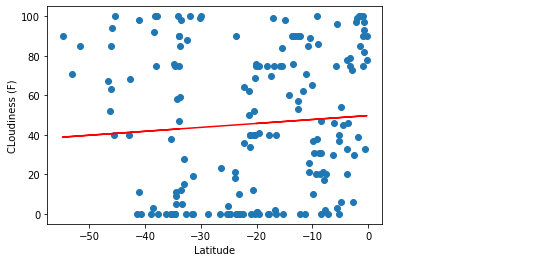

In [19]:
# Add the linear regression equation and line to plot
x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('CLoudiness (F)')
plt.savefig('south_lat_cloud.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

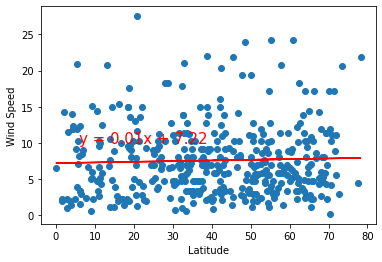

In [20]:
# Add the linear regression equation and line to plot
x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('north_lat_wind.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

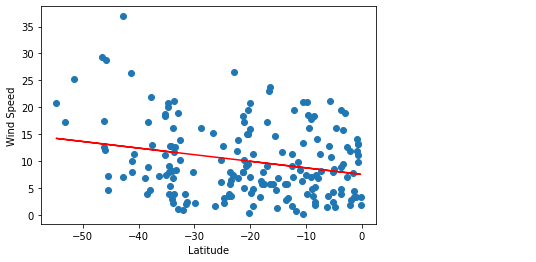

In [21]:
# Add the linear regression equation and line to plot
x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.savefig('south_lat_wind.png')
plt.show()